# Chronic Kidney Disease in Florida
Here we will be investigating Chronic Kidney Disease (CKD) in Florida. The data being used is publicly available at CMS website at [CMS - Specific Chronic Conditions](https://data.cms.gov/medicare-chronic-conditions/specific-chronic-conditions)

In [64]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # Running multiple code in one cell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', 200) # Setting wider view

In [3]:
# Reading in original CSV
df = pd.read_csv('C:/Users/Bader Ale/Desktop/CC_R20_P08_v10_D18_WWDSE_Cond.csv')

In [4]:
df.head()

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN


In [6]:
df.shape

(236124, 12)

In [19]:
df[df['Bene_Geo_Desc']=='Florida']

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
2457,State,Florida,12.0,All,All,All,Alcohol Abuse,0.0232,27106.503600,27364.481500,0.2747,2030.4755
2458,State,Florida,12.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0181,NaN,NaN,NaN,NaN
2459,State,Florida,12.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0409,NaN,NaN,NaN,NaN
2460,State,Florida,12.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0195,NaN,NaN,NaN,NaN
2461,State,Florida,12.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0318,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
176416,State,Florida,12.0,65+,All,All,Hypertension,0.6456,15133.828764,15126.242487,NaN,NaN
176417,State,Florida,12.0,65+,All,All,Ischemic Heart Disease,0.3582,19435.145704,19468.796059,NaN,NaN
176418,State,Florida,12.0,65+,All,All,Osteoporosis,0.0899,17726.219156,17673.513418,NaN,NaN
176419,State,Florida,12.0,65+,All,All,Schizophrenia and Other Psychotic Disorders,0.0201,34253.896373,34385.655337,NaN,NaN


In [38]:
df['Bene_Cond'].unique()

array(['Alcohol Abuse', "Alzheimer's Disease/Dementia", 'Arthritis',
       'Asthma', 'Atrial Fibrillation', 'Autism Spectrum Disorders',
       'COPD', 'Cancer', 'Chronic Kidney Disease', 'Depression',
       'Diabetes', 'Drug/Substance Abuse', 'HIV/AIDS', 'Heart Failure',
       'Hepatitis (Chronic Viral B & C)', 'Hyperlipidemia',
       'Hypertension', 'Ischemic Heart Disease', 'Osteoporosis',
       'Schizophrenia and Other Psychotic Disorders', 'Stroke'],
      dtype=object)

In [74]:
df_fl_ckd = df[(df['Bene_Geo_Desc']=='Florida') & (df['Bene_Cond']=='Chronic Kidney Disease')]

In [77]:
df_fl_ckd.head(10)

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
2561,State,Florida,12.0,All,All,All,Chronic Kidney Disease,0.2821,22980.1173,23073.1785,0.2335,1248.0952
2562,State,Florida,12.0,65+,Dual Status,Medicare Only,Chronic Kidney Disease,0.2689,NaN,NaN,NaN,NaN
2563,State,Florida,12.0,<65,Dual Status,Medicare Only,Chronic Kidney Disease,0.2155,NaN,NaN,NaN,NaN
2564,State,Florida,12.0,All,Dual Status,Medicare Only,Chronic Kidney Disease,0.2657,NaN,NaN,NaN,NaN
2565,State,Florida,12.0,65+,Dual Status,Medicare and Medicaid,Chronic Kidney Disease,0.4372,NaN,NaN,NaN,NaN
2566,State,Florida,12.0,<65,Dual Status,Medicare and Medicaid,Chronic Kidney Disease,0.2757,NaN,NaN,NaN,NaN
2567,State,Florida,12.0,All,Dual Status,Medicare and Medicaid,Chronic Kidney Disease,0.3731,NaN,NaN,NaN,NaN
2568,State,Florida,12.0,65+,Sex,Female,Chronic Kidney Disease,0.2630,NaN,NaN,NaN,NaN
2569,State,Florida,12.0,<65,Sex,Female,Chronic Kidney Disease,0.2430,NaN,NaN,NaN,NaN
2570,State,Florida,12.0,All,Sex,Female,Chronic Kidney Disease,0.2611,NaN,NaN,NaN,NaN


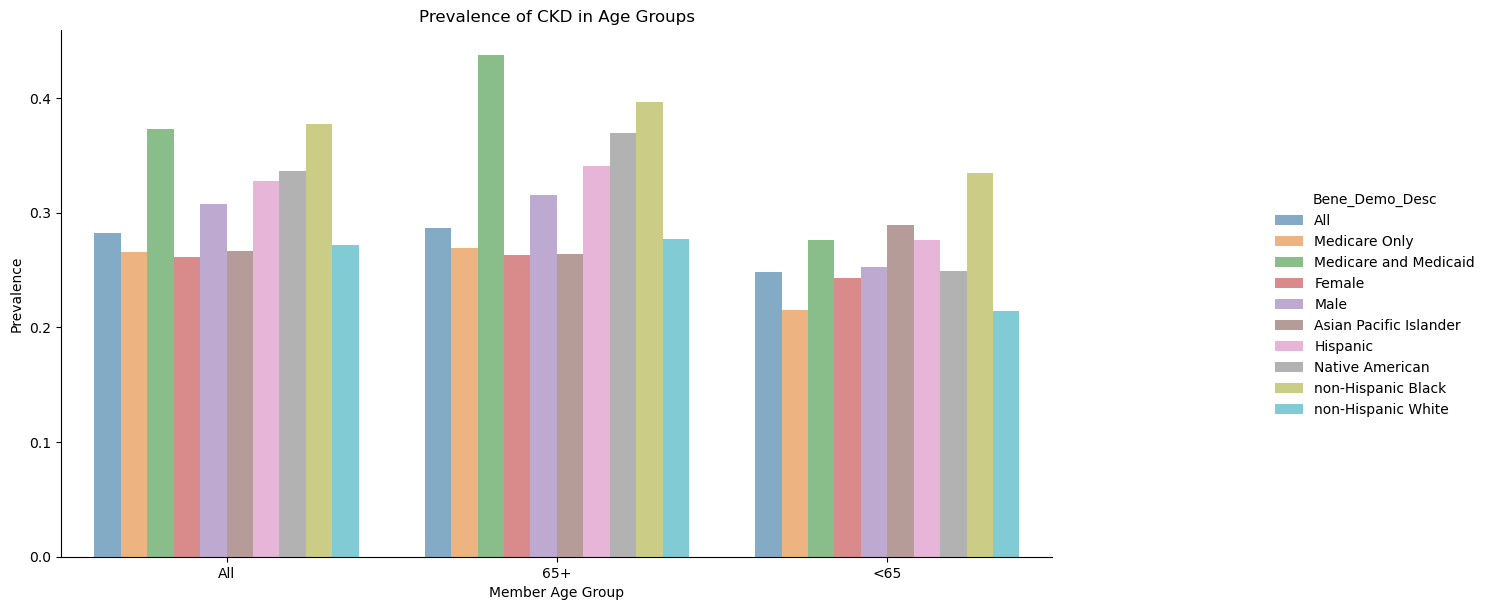

In [86]:
sns.catplot(data=df_fl_ckd, kind='bar', x='Bene_Age_Lvl', y='Prvlnc',hue='Bene_Demo_Desc', errorbar=None,
            alpha=0.6, height=6);
plt.title('Prevalence of CKD in Age Groups')
plt.xlabel('Member Age Group')
plt.ylabel('Prevalence')
fig = plt.gcf()
fig.set_size_inches(16, 6);
